<a href="https://colab.research.google.com/github/NitayAmiel/HW_AI_Course/blob/main/HW2_AI_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def real_celsius_to_faranhait(deg):
  return (deg*(9/5) + 32)


building and training the model with one nueron

Epoch 1/500
10/10 - 5s - loss: 2285.6655 - 5s/epoch - 478ms/step
Epoch 2/500
10/10 - 0s - loss: 2273.7363 - 20ms/epoch - 2ms/step
Epoch 3/500
10/10 - 0s - loss: 2257.2144 - 20ms/epoch - 2ms/step
Epoch 4/500
10/10 - 0s - loss: 2245.4583 - 19ms/epoch - 2ms/step
Epoch 5/500
10/10 - 0s - loss: 2229.8313 - 19ms/epoch - 2ms/step
Epoch 6/500
10/10 - 0s - loss: 2216.1255 - 19ms/epoch - 2ms/step
Epoch 7/500
10/10 - 0s - loss: 2201.8760 - 20ms/epoch - 2ms/step
Epoch 8/500
10/10 - 0s - loss: 2188.3679 - 20ms/epoch - 2ms/step
Epoch 9/500
10/10 - 0s - loss: 2173.9414 - 23ms/epoch - 2ms/step
Epoch 10/500
10/10 - 0s - loss: 2162.8472 - 20ms/epoch - 2ms/step
Epoch 11/500
10/10 - 0s - loss: 2149.4651 - 20ms/epoch - 2ms/step
Epoch 12/500
10/10 - 0s - loss: 2133.9626 - 19ms/epoch - 2ms/step
Epoch 13/500
10/10 - 0s - loss: 2123.2280 - 19ms/epoch - 2ms/step
Epoch 14/500
10/10 - 0s - loss: 2108.9565 - 20ms/epoch - 2ms/step
Epoch 15/500
10/10 - 0s - loss: 2095.9443 - 21ms/epoch - 2ms/step
Epoch 16/500
10/10 

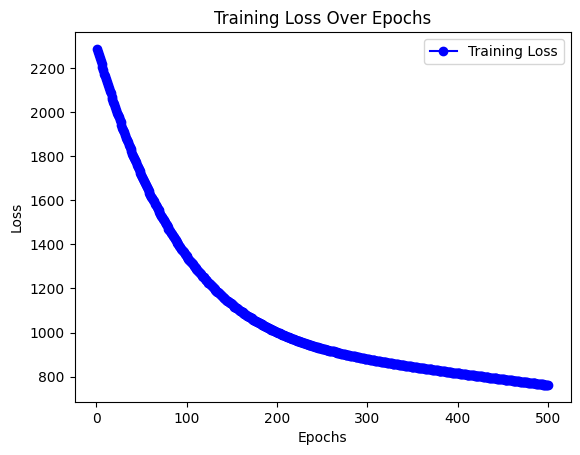

1/1 [==============================] - 0s 78ms/step
Predictions:
Input: -45, Predicted Output: -68.62976837158203, Actual Output: -49.0
Input: -35, Predicted Output: -52.48999786376953, Actual Output: -31.0
Input: -25, Predicted Output: -36.3502197265625, Actual Output: -13.0
Input: -15, Predicted Output: -20.210445404052734, Actual Output: 5.0
Input: -5, Predicted Output: -4.070672035217285, Actual Output: 23.0
Input: 5, Predicted Output: 12.06910228729248, Actual Output: 41.0
Input: 15, Predicted Output: 28.208877563476562, Actual Output: 59.0
Input: 25, Predicted Output: 44.34864807128906, Actual Output: 77.0
Input: 35, Predicted Output: 60.488426208496094, Actual Output: 95.0
Input: 45, Predicted Output: 76.6281967163086, Actual Output: 113.0


In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming your dataset is named 'data' and is a list of tuples (feature, response)
data = []
for i in range(-5,5):
  data.append((i*10, real_celsius_to_faranhait(i*10)))

# Separate the data into features and responses
features = np.array([sample[0] for sample in data])
responses = np.array([sample[1] for sample in data])

# Build the neural network
model = Sequential()

# Adding one neuron without activation function
model.add(Dense(units=1, input_dim=1, activation=None))

# Compile the model with ADAM optimizer and a learning rate of 0.01
optimizer = Adam(lr=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with your specified parameters
history = model.fit(features, responses, epochs=500, batch_size=1, verbose=2)




# Plotting the loss function
plt.plot(range(1, 501), history.history['loss'], marker='o', linestyle='-', color='b', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

features_to_prediction = [i*10 + 5 for i in range(-5,5)]
# Now you can use the trained model for predictions
predictions = model.predict(features_to_prediction)

# Print the predictions
print("Predictions:")
for i in range(len(features_to_prediction)):
    print(f"Input: {features_to_prediction[i]}, Predicted Output: {predictions[i][0]}, Actual Output: {real_celsius_to_faranhait(features_to_prediction[i])}")


In [9]:
weights = model.get_weights()
print("Weights:")
print(f"Weight for the input feature: {weights[0][0][0]}")
print(f"Bias term: {weights[1][0]}")

Weights:
Weight for the input feature: 1.6139774322509766
Bias term: 3.9992151260375977


now we will change the model to get better results
the changes are , optimazation algorithm SGD, 1000 epochs, batch size = 5, lr = 0.001

[(-50.0, -58.0), (-40.0, -40.0), (-30.0, -22.0), (-20.0, -4.0), (-10.0, 14.0), (0.0, 32.0), (10.0, 50.0), (20.0, 68.0), (30.0, 86.0), (40.0, 104.0)]
Epoch 1/1000
2/2 - 0s - loss: 1950.4529 - 293ms/epoch - 146ms/step
Epoch 2/1000
2/2 - 0s - loss: 3661.6265 - 8ms/epoch - 4ms/step
Epoch 3/1000
2/2 - 0s - loss: 1092.9866 - 7ms/epoch - 3ms/step
Epoch 4/1000
2/2 - 0s - loss: 1366.3494 - 7ms/epoch - 4ms/step
Epoch 5/1000
2/2 - 0s - loss: 1863.3278 - 7ms/epoch - 4ms/step
Epoch 6/1000
2/2 - 0s - loss: 1039.6578 - 7ms/epoch - 4ms/step
Epoch 7/1000
2/2 - 0s - loss: 1549.7977 - 11ms/epoch - 5ms/step
Epoch 8/1000
2/2 - 0s - loss: 4199.3384 - 8ms/epoch - 4ms/step
Epoch 9/1000
2/2 - 0s - loss: 2851.9211 - 9ms/epoch - 4ms/step
Epoch 10/1000
2/2 - 0s - loss: 986.2394 - 7ms/epoch - 4ms/step
Epoch 11/1000
2/2 - 0s - loss: 1439.8877 - 8ms/epoch - 4ms/step
Epoch 12/1000
2/2 - 0s - loss: 1065.6647 - 7ms/epoch - 4ms/step
Epoch 13/1000
2/2 - 0s - loss: 3021.1509 - 7ms/epoch - 3ms/step
Epoch 14/1000
2/2 - 0s -

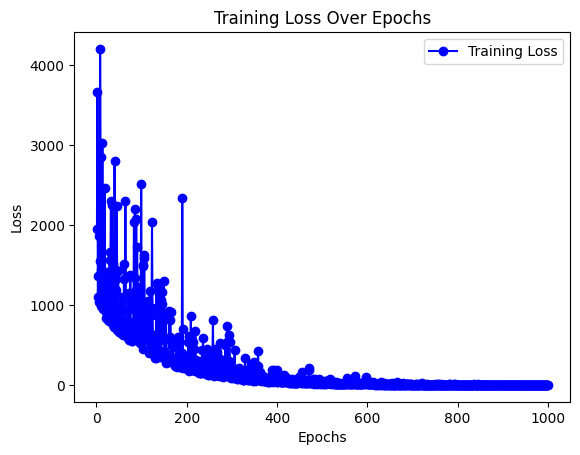

1/1 [==============================] - 0s 54ms/step
Predictions:
Input: -45, Predicted Output: -49.72279357910156, Actual Output: -49.0
Input: -35, Predicted Output: -31.66900634765625, Actual Output: -31.0
Input: -25, Predicted Output: -13.615222930908203, Actual Output: -13.0
Input: -15, Predicted Output: 4.438562393188477, Actual Output: 5.0
Input: -5, Predicted Output: 22.492347717285156, Actual Output: 23.0
Input: 5, Predicted Output: 40.54613494873047, Actual Output: 41.0
Input: 15, Predicted Output: 58.59992218017578, Actual Output: 59.0
Input: 25, Predicted Output: 76.65370178222656, Actual Output: 77.0
Input: 35, Predicted Output: 94.70748901367188, Actual Output: 95.0
Input: 45, Predicted Output: 112.76127624511719, Actual Output: 113.0


In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Assuming your dataset is named 'data' and is a list of tuples (feature, response)
data = []
for i in range(-5,5):
  data.append((float(i*10), real_celsius_to_faranhait(i*10)))
print(data)
# Separate the data into features and responses
features = np.array([sample[0] for sample in data])
responses = np.array([sample[1] for sample in data])

# Build the neural network
model = Sequential()

# Adding one neuron without activation function
model.add(Dense(units=1, input_dim=1, activation=None))

# Compile the model with ADAM optimizer and a learning rate of 0.01
optimizer = SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with your specified parameters
history = model.fit(features, responses, epochs=1000, batch_size=5, verbose=2)




# Plotting the loss function
plt.plot(range(1, 1001), history.history['loss'], marker='o', linestyle='-', color='b', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

features_to_prediction = [i*10 + 5 for i in range(-5,5)]
# Now you can use the trained model for predictions
predictions = model.predict(features_to_prediction)

# Print the predictions
print("Predictions:")
for i in range(len(features_to_prediction)):
    print(f"Input: {features_to_prediction[i]}, Predicted Output: {predictions[i][0]}, Actual Output: {real_celsius_to_faranhait(features_to_prediction[i])}")